In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
replace_column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
for i in replace_column:
    df[i]=df[i].replace(0,df[i].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

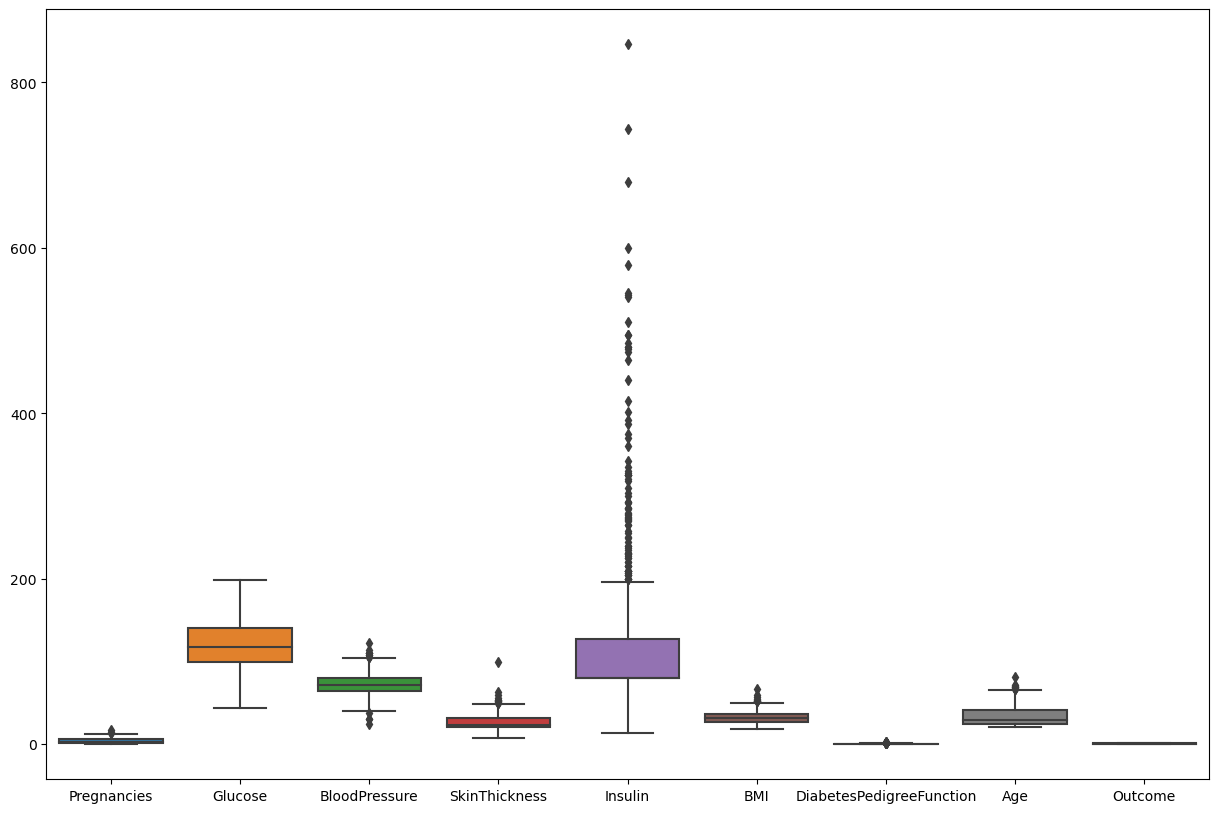

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47
748,3,187.0,70.0,22.000000,200.000000,36.4,0.408,36
42,7,106.0,92.0,18.000000,79.799479,22.7,0.235,48
485,0,135.0,68.0,42.000000,250.000000,42.3,0.365,24
543,4,84.0,90.0,23.000000,56.000000,39.5,0.159,25
...,...,...,...,...,...,...,...,...
188,8,109.0,76.0,39.000000,114.000000,27.9,0.640,31
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53
645,2,157.0,74.0,35.000000,440.000000,39.4,0.134,30
381,0,105.0,68.0,22.000000,79.799479,20.0,0.236,22


In [40]:
y_test

766    1
748    1
42     0
485    1
543    0
      ..
188    1
8      1
645    0
381    0
314    1
Name: Outcome, Length: 231, dtype: int64

In [14]:
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameter={
    'penalty':('l1','l2','elasticnet',None),
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
}

In [19]:
gmodel=GridSearchCV(estimator=LogisticRegression(),param_grid=parameter,cv=10,scoring='accuracy')

In [20]:
gmodel.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
560 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [21]:
gmodel.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [22]:
y_pred=gmodel.predict(X_test)

In [23]:
confusion_matrix(y_pred,y_test)

array([[134,  37],
       [ 16,  44]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       171
           1       0.54      0.73      0.62        60

    accuracy                           0.77       231
   macro avg       0.72      0.76      0.73       231
weighted avg       0.80      0.77      0.78       231



In [26]:
accuracy_score(y_pred,y_test)

0.7705627705627706

In [27]:
{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
gmodel1=LogisticRegression(solver='liblinear')

In [29]:
gmodel1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [30]:
y_pred1=gmodel1.predict(X_test)

In [31]:
confusion_matrix(y_pred1,y_test)

array([[133,  32],
       [ 17,  49]], dtype=int64)

In [32]:
accuracy_score(y_pred1,y_test)

0.7878787878787878

In [33]:
import joblib

In [34]:
scaler=joblib.dump(scaler,'scaler.pkl')

In [35]:
model=joblib.dump(gmodel1,'gmodel1.pkl')

In [36]:
X_test

array([[-0.83425971,  0.14429084, -1.04064174, ..., -0.36002334,
        -0.40594595,  1.14277451],
       [-0.23412915,  2.17771479, -0.20273834, ...,  0.547541  ,
        -0.2184046 ,  0.22435696],
       [ 0.96613198, -0.52240553,  1.64064914, ..., -1.42605129,
        -0.76831397,  1.22626702],
       ...,
       [-0.53419443,  1.17767022,  0.13242302, ...,  0.9797145 ,
        -1.08935933, -0.27659808],
       [-1.13432499, -0.55574035, -0.37031902, ..., -1.81500744,
        -0.76513531, -0.94453812],
       [ 0.96613198, -0.42240108,  0.63516506, ...,  0.47551209,
         2.06705688,  0.80880449]])